IMPORTAR LIBREARIAS Y CARGAR DATOS
Se importa las bibliotecas necesarias para el analisis,acceder a Google Drive y obtener archivos almacenados.

In [6]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# importamos la libreria de pandas
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [7]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
columns_names = ['edad', 'sexo', 'tipo_dolor_pecho', 'presion_reposo', 'colesterol', 'sangre_ayunas', 'descansando', 'frecuencia_cardiaca_max', 'angina_inducida_por_ejercicio', 'viejo_pico', 'pendiente_st', 'objetivo']
data = pd.read_csv('/content/gdrive/MyDrive/enfermedades_del_corazon (1).csv', header=None, skiprows=1, names=columns_names)
X = data.iloc[:, 0:11]
y = data.iloc[:, 11]
m = len(y)
data.head()

,edad,sexo,tipo_dolor_pecho,presion_reposo,colesterol,sangre_ayunas,descansando,frecuencia_cardiaca_max,angina_inducida_por_ejercicio,viejo_pico,pendiente_st,objetivo
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
#print(data.head())
#print(X.head())
print(y.head())

0    0
1    1
2    0
3    1
4    0
Name: objetivo, dtype: int64


NORMALIZACION DE CARACTERISTICAS
Define una funcion para normalizar las caracteristicas restando la media y dividiendo por desviacion estandar.


In [11]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = X.mean()
    sigma = X.std()
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma


In [12]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

      edad  sexo  tipo_dolor_pecho  presion_reposo  colesterol  sangre_ayunas  \
0       40     1                 2             140         289              0   
1       49     0                 3             160         180              0   
2       37     1                 2             130         283              0   
3       48     0                 4             138         214              0   
4       54     1                 3             150         195              0   
...    ...   ...               ...             ...         ...            ...   
1185    45     1                 1             110         264              0   
1186    68     1                 4             144         193              1   
1187    57     1                 4             130         131              0   
1188    57     0                 2             130         236              0   
1189    38     1                 3             138         175              0   

      descansando  frecuenc

AGREGAR COLUMNA INTERSECCION CALCULAR COSTO
Se agrega una columna de unos X para representar el termino de interseccion, en el modelo de regresion y define una funcion para calcular el costo de la regresion lineal multivariable.

In [13]:
X = pd.concat([pd.Series(1, index=X.index, name='intercept'), X_norm], axis=1)

In [14]:
print(X)

      intercept      edad      sexo  tipo_dolor_pecho  presion_reposo  \
0             1 -1.466111  0.555762         -1.317797        0.427149   
1             1 -0.504388 -1.797820         -0.248827        1.515950   
2             1 -1.786686  0.555762         -1.317797       -0.117252   
3             1 -0.611246 -1.797820          0.820142        0.318269   
4             1  0.029902  0.555762         -0.248827        0.971549   
...         ...       ...       ...               ...             ...   
1185          1 -0.931821  0.555762         -2.386766       -1.206053   
1186          1  1.525916  0.555762          0.820142        0.644909   
1187          1  0.350477  0.555762          0.820142       -0.117252   
1188          1  0.350477 -1.797820         -1.317797       -0.117252   
1189          1 -1.679828  0.555762         -0.248827        0.318269   

      colesterol  sangre_ayunas  descansando  frecuencia_cardiaca_max  \
0       0.775348      -0.520711    -0.802335      

In [15]:
def computeCostMulti(X, y, theta):
    """
    Calcula el costo de la regresión lineal multivariable.

    Args:
        X (pd.DataFrame): DataFrame con las características (incluyendo la columna de unos).
        y (pd.Series): Series con los valores objetivo.
        theta (pd.Series): Series con los parámetros del modelo.

    Returns:
        float: El costo J.
    """
    m = len(y)  # Número de ejemplos de entrenamiento (usando len para Pandas Series)

    # Calcula las predicciones (h) usando la multiplicación de matrices de Pandas
    h = X.dot(theta)

    # Calcula el costo J usando las operaciones de Pandas
    J = (1/(2 * m)) * ((h - y)**2).sum()

    return J

DESCENSO POR EL GRADIENTE
Funcion para realizar el descenso por el gradiente y encontrar los parametros optimos del modelo.

In [16]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Realiza el descenso por el gradiente para la regresión lineal multivariable.

    Args:
        X (pd.DataFrame): DataFrame con las características (incluyendo la columna de unos).
        y (pd.Series): Series con los valores objetivo.
        theta (pd.Series): Series con los parámetros del modelo.
        alpha (float): Coeficiente de aprendizaje.
        num_iters (int): Número de iteraciones.

    Returns:
        tuple: (theta, J_history)
            - theta (pd.Series): Los parámetros del modelo actualizados.
            - J_history (list): El historial del costo J.
    """
    m = len(y)  # Número de ejemplos de entrenamiento
    theta = theta.copy()  # Copia de theta para actualizarla
    J_history = []

    for _ in range(num_iters):
        # Calcula las predicciones
        h = X.dot(theta)

        # Actualiza theta usando las operaciones de Pandas
        theta = theta - (alpha / m) * (X.T.dot(h - y))

        # Guarda el costo en el historial
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: intercept                        0.518910
edad                             0.021012
sexo                             0.080306
tipo_dolor_pecho                 0.109645
presion_reposo                   0.014532
colesterol                      -0.039585
sangre_ayunas                    0.047428
descansando                      0.015194
frecuencia_cardiaca_max         -0.051574
angina_inducida_por_ejercicio    0.086253
viejo_pico                       0.061399
pendiente_st                     0.107268
dtype: float64
Index(['intercept', 'edad', 'sexo', 'tipo_dolor_pecho', 'presion_reposo',
       'colesterol', 'sangre_ayunas', 'descansando', 'frecuencia_cardiaca_max',
       'angina_inducida_por_ejercicio', 'viejo_pico', 'pendiente_st'],
      dtype='object')
Index(['intercept', 'edad', 'sexo', 'tipo_dolor_pecho', 'presion_reposo',
       'colesterol', 'sangre_ayunas', 'descansando', 'frecuencia_cardiaca_max',
       'angina_inducida_por_ej

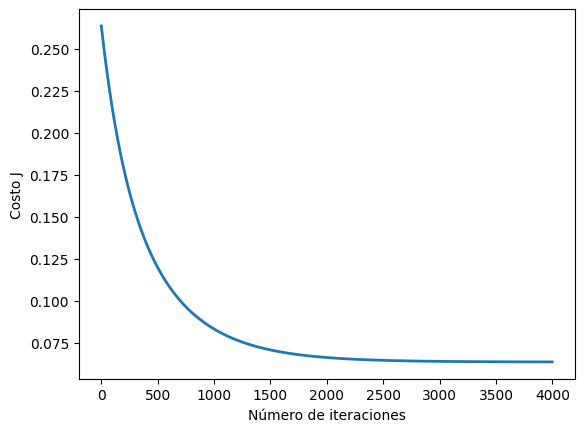

In [17]:
# Elegir algún valor para alpha (probar varias alternativas)
alpha = 0.001  # alpha = 0.003
num_iters = 4000

# Inicializa theta como una serie de Pandas
#theta = pd.Series(np.zeros(3), index=['intercept', X.columns[0], X.columns[1]])
theta = pd.Series(np.zeros(X.shape[1]), index=X.columns)

# Ejecuta el descenso por el gradiente (la función ya está adaptada para Pandas)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo (pyplot sigue igual)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {}'.format(theta))

# # Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
# X_array = pd.Series([1, 1650, 3], index=['intercept', X.columns[0], X.columns[1]])
# X_array[1:] = (X_array[1:] - mu) / sigma  # Normaliza las características
# price = X_array.dot(theta)  # Usando la multiplicación de matrices de Pandas

# print('El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))

# Definir los valores del nuevo paciente (estos son ejemplos)
nuevo_paciente = pd.Series([63, 1, 3, 145, 233, 1,1, 150, 0, 2.3, 3],
                           index=['edad', 'sexo', 'tipo_dolor_pecho', 'presion_reposo',
                                  'colesterol', 'sangre_ayunas','descansando', 'frecuencia_cardiaca_max',
                                  'angina_inducida_por_ejercicio', 'viejo_pico', 'pendiente_st'])

# Normalizar el nuevo paciente (usando las medias y desviaciones calculadas)
nuevo_paciente = (nuevo_paciente - mu[nuevo_paciente.index]) / sigma[nuevo_paciente.index]

# Agregar la intersección (bias term)
nuevo_paciente = pd.concat([pd.Series([1], index=['intercept']), nuevo_paciente])
print(nuevo_paciente.index)
print(theta.index)
# Verificar si los índices son iguales
print("\n¿Los índices son iguales?", nuevo_paciente.index.equals(theta.index))

# Realizar la predicción
prediccion = nuevo_paciente.dot(theta)

# Convertir la salida a una probabilidad usando la función sigmoide (si usas regresión logística)
probabilidad = 1 / (1 + np.exp(-prediccion))

print('Probabilidad de que el paciente tenga una enfermedad del corazón: {:.2f}%'.format(probabilidad * 100))


PREDICCION CON NUEVO PACIENTE
Define el nuevo paciente, normaliza y agrega interaccion, realiza prediccion y calcula probabilidad.

In [18]:
nuevo_paciente = pd.Series([83, 0, 3, 122, 213, 1,1, 150, 1, 2.3, 3],
                           index=['edad', 'sexo', 'tipo_dolor_pecho', 'presion_reposo',
                                  'colesterol', 'sangre_ayunas','descansando', 'frecuencia_cardiaca_max',
                                  'angina_inducida_por_ejercicio', 'viejo_pico', 'pendiente_st'])

# Normalizar el nuevo paciente (usando las medias y desviaciones calculadas)
nuevo_paciente = (nuevo_paciente - mu[nuevo_paciente.index]) / sigma[nuevo_paciente.index]

# Agregar la intersección (bias term)
nuevo_paciente = pd.concat([pd.Series([1], index=['intercept']), nuevo_paciente])
print(nuevo_paciente.index)
print(theta.index)
# Verificar si los índices son iguales
print("\n¿Los índices son iguales?", nuevo_paciente.index.equals(theta.index))

# Realizar la predicción
prediccion = nuevo_paciente.dot(theta)

# Convertir la salida a una probabilidad usando la función sigmoide (si usas regresión logística)
probabilidad = 1 / (1 + np.exp(-prediccion))

print('Probabilidad de que el paciente tenga una enfermedad del corazón: {:.2f}%'.format(probabilidad * 100))

Index(['intercept', 'edad', 'sexo', 'tipo_dolor_pecho', 'presion_reposo',
       'colesterol', 'sangre_ayunas', 'descansando', 'frecuencia_cardiaca_max',
       'angina_inducida_por_ejercicio', 'viejo_pico', 'pendiente_st'],
      dtype='object')
Index(['intercept', 'edad', 'sexo', 'tipo_dolor_pecho', 'presion_reposo',
       'colesterol', 'sangre_ayunas', 'descansando', 'frecuencia_cardiaca_max',
       'angina_inducida_por_ejercicio', 'viejo_pico', 'pendiente_st'],
      dtype='object')

¿Los índices son iguales? True
Probabilidad de que el paciente tenga una enfermedad del corazón: 71.25%


ECUACION NORMAL
Funcion para calcular los parametros del modelo usando la ecuacion normal y calcula la funcion para obtener los parametros de (theta)

In [19]:
def normalEqn(X, y):
    """
    Calcula los parámetros theta usando la ecuación normal.

    Args:
        X (pd.DataFrame): DataFrame con las características (incluyendo la columna de unos).
        y (pd.Series): Series con los valores objetivo.

    Returns:
        pd.Series: Los parámetros theta calculados.
    """
    # Calcula theta usando la ecuación normal: theta = (X'X)^(-1) X'y
    theta_values = np.linalg.solve(X.T.dot(X).values, X.T.dot(y).values)

    # Asigna los valores de theta al índice de las columnas de X
    theta = pd.Series(theta_values, index=X.columns)

    return theta


In [20]:
# Calcula los parámetros con la ecuación de la normal (la función ya está adaptada)
theta = normalEqn(X, y)

# Muestra los resultados (se puede imprimir theta directamente)
print('Theta calculado a partir de la ecuación de la normal: {}'.format(theta))

nuevo_paciente = pd.Series([63, 1, 3, 145, 233, 1,1, 150, 0, 2.3, 3],
                           index=['edad', 'sexo', 'tipo_dolor_pecho', 'presion_reposo',
                                  'colesterol', 'sangre_ayunas','descansando', 'frecuencia_cardiaca_max',
                                  'angina_inducida_por_ejercicio', 'viejo_pico', 'pendiente_st'])

# Normalizar el nuevo paciente (usando las medias y desviaciones calculadas)
nuevo_paciente = (nuevo_paciente - mu[nuevo_paciente.index]) / sigma[nuevo_paciente.index]

# Agregar la intersección (bias term)
nuevo_paciente = pd.concat([pd.Series([1], index=['intercept']), nuevo_paciente])
print(nuevo_paciente.index)
print(theta.index)
# Verificar si los índices son iguales
print("\n¿Los índices son iguales?", nuevo_paciente.index.equals(theta.index))

# Realizar la predicción
prediccion = nuevo_paciente.dot(theta)

# Convertir la salida a una probabilidad usando la función sigmoide (si usas regresión logística)
probabilidad = 1 / (1 + np.exp(-prediccion))

print('Probabilidad de que el paciente tenga una enfermedad del corazón: {:.2f}%'.format(probabilidad * 100))

Theta calculado a partir de la ecuación de la normal: intercept                        0.528571
edad                             0.021104
sexo                             0.081433
tipo_dolor_pecho                 0.112259
presion_reposo                   0.015736
colesterol                      -0.039144
sangre_ayunas                    0.047229
descansando                      0.014943
frecuencia_cardiaca_max         -0.048372
angina_inducida_por_ejercicio    0.085118
viejo_pico                       0.057947
pendiente_st                     0.111507
dtype: float64
Index(['intercept', 'edad', 'sexo', 'tipo_dolor_pecho', 'presion_reposo',
       'colesterol', 'sangre_ayunas', 'descansando', 'frecuencia_cardiaca_max',
       'angina_inducida_por_ejercicio', 'viejo_pico', 'pendiente_st'],
      dtype='object')
Index(['intercept', 'edad', 'sexo', 'tipo_dolor_pecho', 'presion_reposo',
       'colesterol', 'sangre_ayunas', 'descansando', 'frecuencia_cardiaca_max',
       'angina_inducida_po